## 读取excel（csv）文件

In [1]:
import pandas as pd

In [2]:
data_csv = pd.read_csv('temp/musicdata.csv',header=0)
                                            #`pd.read_csv` 函数通常会自动检测 CSV 文件中的分隔符。
                                            #默认情况下，它假设分隔符是逗号（`,`）。
                                            #`pd.read_csv` 默认不会假设分隔符是一个空格。
                                            #`pd.read_csv` 默认会假设第一行是列名，即 `header=0`。

In [3]:
data_csv

,format,metric,date,number_of_records,value_actual
0,CD,Units,2020/7/31 22:01,1,NaN
1,CD,Units,2020/7/23 6:12,1,NaN
2,CD,Units,2020/7/13 9:30,1,NaN
3,CD,Units,2020/6/30 14:26,1,NaN
4,CD,Units,2020/6/23 20:21,1,NaN
...,...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2013/12/8 3:10,1,6.205390
3004,Vinyl Single,Value (Adjusted),2013/11/21 1:50,1,5.198931
3005,Vinyl Single,Value (Adjusted),2013/10/12 16:06,1,6.339678
3006,Vinyl Single,Value (Adjusted),2013/10/9 17:27,1,5.386197


## 存储数据框

In [4]:
data_csv.to_csv('temp/data_csv.csv',index=True,header=True)#默认保存行索引，若无行索引，生成0-n的索引
                                                           #默认保存列名，默认‘encoding = UTF-8’

In [12]:
data_excel=pd.read_excel('temp/musicdata.xlsx',sheet_name = 'music')#多了sheet_name

In [13]:
data_excel

,是覅,646
0,水电费就,士大夫
1,155,534


In [20]:
data_excel.to_excel('temp/music2.xlsx',sheet_name='music',index=None)
#使用`to_excel`函数时，数据的编码通常不是需要关注的问题，因为Excel文件本身并不直接处理字符编码。
#Excel文件存储数据为二进制格式

## Dataframe的基础操作

In [1]:
import pandas as pd

In [6]:
#Series系列
ser1 = pd.Series([1,2,3],index=['a','b','c'])
print(ser1)
ser2 = pd.Series({'a':[1,5,9],'b':[4,'sdf',7]})
print(ser2)

a    1
b    2
c    3
dtype: int64
a      [1, 5, 9]
b    [4, sdf, 7]
dtype: object


#### Dataframe

In [11]:
d = [[2,3,4],[4,5,6],[7,8,9]]
print(d)
dfd = pd.DataFrame(d,index = ['a','b','c'],columns=['q','w','e'])
dfd


[[2, 3, 4], [4, 5, 6], [7, 8, 9]]


,q,w,e
a,2,3,4
b,4,5,6
c,7,8,9


In [18]:
s = {'color':[1,2,3,4],
     'size':[4,5,6,7],
     'length':[7,8,90,5]}
dfs = pd.DataFrame(s,index = ['a','s','d','f'])#字典的值化为列，键化为列索引
dfs

,color,size,length
a,1,4,7
s,2,5,8
d,3,6,90
f,4,7,5


In [22]:
print(pd.DataFrame(index= [1,2],columns=[1,3]))
print(pd.DataFrame(1,index = [1,2],columns = [3,4]))#全为 1 的框

     1    3
1  NaN  NaN
2  NaN  NaN
   3  4
1  1  1
2  1  1


In [28]:
s = {'color':[1,2,3,4],
     'size':[4,5,'o',7],
     'length':[7,8,90,5]}
dfs = pd.DataFrame(s,index = ['a','s','d','f'])#字典的值化为列，键化为列索引
dfs.values
dfs.ndim
dfs.dtypes
dfs.shape

(4, 3)

In [51]:
#DataFrame的查改增删操作

s = {'color':[1,2,3,4],
     'size':[4,5,6,7],
     'length':[7,8,90,5]}
dfs = pd.DataFrame(s,index = ['a','s','d','f'])#字典的值化为列，键化为列索引
print(dfs)
print(dfs['color'])#返回一个Series
print(dfs[['color','size']])

print(dfs.head(2))
print(dfs.tail(2))

print(dfs.iloc[0,0])
print(dfs.iloc[0])#选择DataFrame的第一行（索引为0的行）。
type(dfs.iloc[0])
print(dfs.iloc[1:3,0])
print(dfs.iloc[:,2])
print(dfs.iloc[1:3,1:2])
# 通过行列名称访问
print(dfs.loc['a'])
print(dfs.loc['a':'d','color':'size'])#闭区间操作
print(dfs.loc[['s','a'],['length','color']])

#特 返回值有区别
print(dfs.iloc[1:3,0])#返回一个series
print(dfs.iloc[1:3,0:1])#返回一个dataframe
#两者之间的共通点：返回的都是一个dfs的视图，被修改都会影响到dfs

se = dfs.iloc[1:3,0:1]
se.loc['s','color']=9   #修改数据框里的元素
print(se)
print(dfs)
# 如果要避免这种情况，也可以使用`.copy()`来创建Series的副本：
# column_subset = dfs.iloc[1:3, 0].copy()
#`column_subset`就是一个独立的Series，修改它不会影响原始DataFrame `dfs`。

   color  size  length
a      1     4       7
s      2     5       8
d      3     6      90
f      4     7       5
a    1
s    2
d    3
f    4
Name: color, dtype: int64
   color  size
a      1     4
s      2     5
d      3     6
f      4     7
   color  size  length
a      1     4       7
s      2     5       8
   color  size  length
d      3     6      90
f      4     7       5
1
color     1
size      4
length    7
Name: a, dtype: int64
s    2
d    3
Name: color, dtype: int64
a     7
s     8
d    90
f     5
Name: length, dtype: int64
   size
s     5
d     6
color     1
size      4
length    7
Name: a, dtype: int64
   color  size
a      1     4
s      2     5
d      3     6
   length  color
s       8      2
a       7      1
s    2
d    3
Name: color, dtype: int64
   color
s      2
d      3
   color
s      9
d      3
   color  size  length
a      1     4       7
s      9     5       8
d      3     6      90
f      4     7       5


In [53]:
#增添数据框中的元素
s = {'color':[1,2,3,4],
     'size':[4,5,6,7],
     'length':[7,8,90,5]}
dfs = pd.DataFrame(s,index = ['a','s','d','f'])

dfs['g']=5
dfs['h']=[44,55,666,888]
print(dfs)#对列进行增添


   color  size  length  g    h
a      1     4       7  5   44
s      2     5       8  5   55
d      3     6      90  5  666
f      4     7       5  5  888


In [63]:
#删除数据框中的元素(删除行或列)
s = {'color':[1,2,3,4],
     'size':[4,5,6,7],
     'length':[7,8,90,5]}
dfs = pd.DataFrame(s,index = ['a','s','d','f'])

print(dfs)
print(dfs.drop('f',axis = 0))#位置参数一定要在关键字参数前面，（axis=0,'f'）会报错
                            
print(dfs.drop('a',axis = 0,inplace = True)) 
#inplace默认为False，返回值是一个副本，若为True，返回None，直接在dfs上面进行删除
print(dfs)

   color  size  length
a      1     4       7
s      2     5       8
d      3     6      90
f      4     7       5
   color  size  length
a      1     4       7
s      2     5       8
d      3     6      90
None
   color  size  length
s      2     5       8
d      3     6      90
f      4     7       5


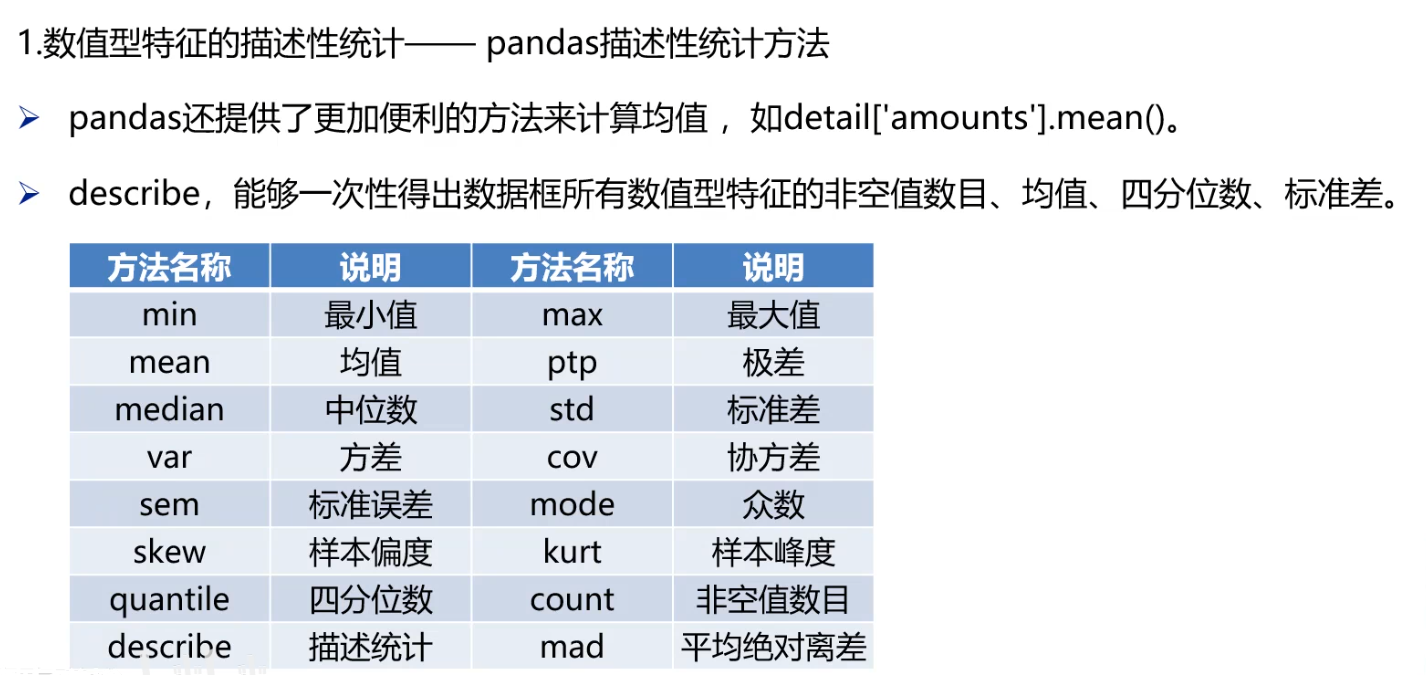

In [73]:
#简单的描述性分析
s = {'color':[1,2,3,4],
     'size':[4,5,6,7],
     'length':[7,8,90,5]}
dfs = pd.DataFrame(s,index = ['a','s','d','f'])

print(dfs)
print(dfs.mean(axis = 0))#pd.mean(dfs)是错误的
#`mean` 函数是 `pandas.core.frame.DataFrame` 类的一个方法，而不是一个全局函数。
#numpy库中有`mean`的全局函数。`numpy.mean()` 是一个全局函数。同时array下面也有一个方法mean()
type(dfs)

dfs.std(axis=0)

dfs.describe()#无axis参数，默认axis=0
dfs.T.describe()#转置可求列方向的统计量

dfs['color'].value_counts()

   color  size  length
a      1     4       7
s      2     5       8
d      3     6      90
f      4     7       5
color      2.5
size       5.5
length    27.5
dtype: float64


color
1    1
2    1
3    1
4    1
Name: count, dtype: int64

## 转换与处理时间数据

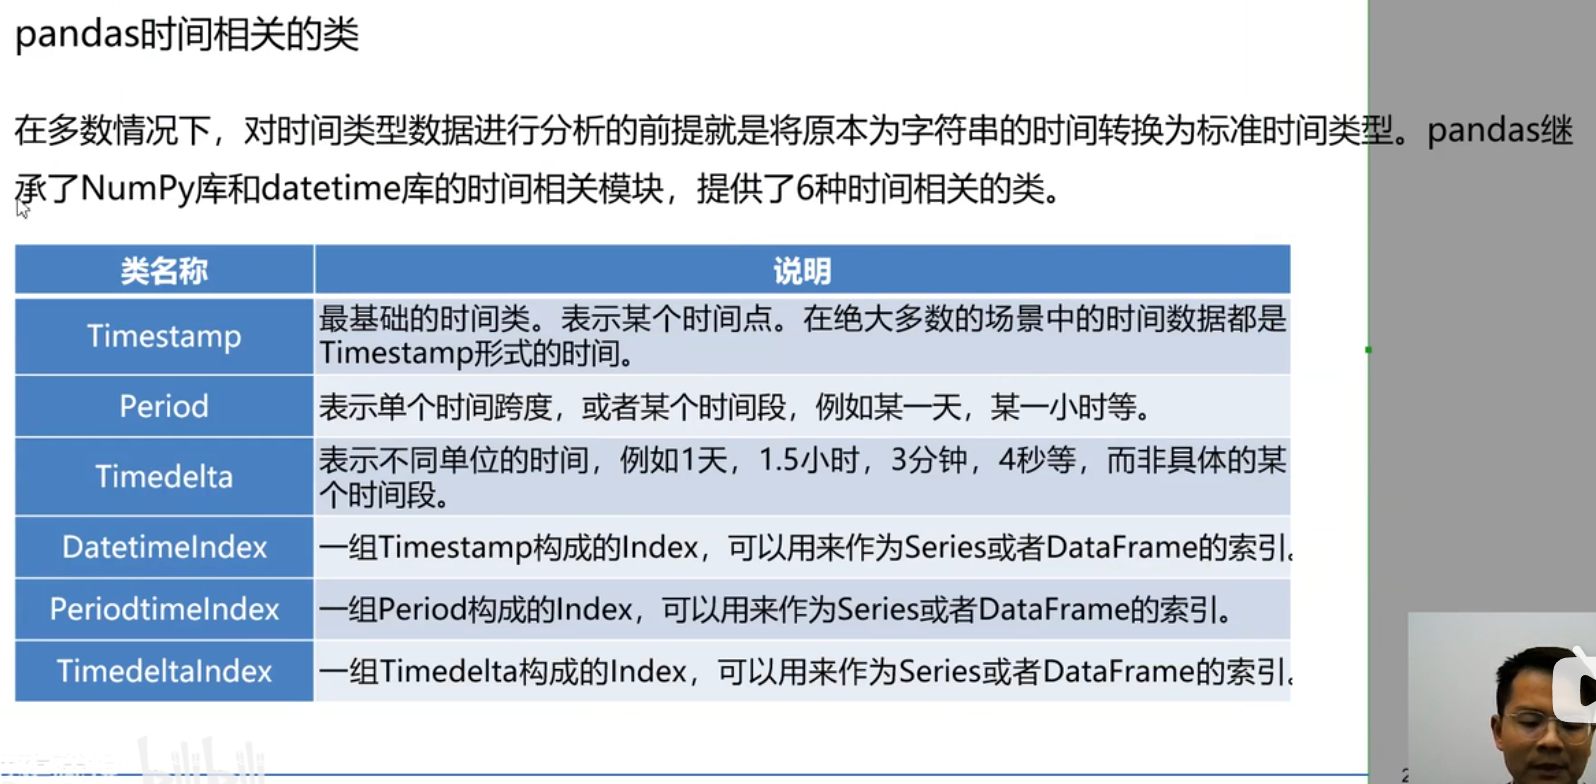

In [1]:
import pandas as pd

In [5]:
order = pd.read_csv('temp/meal_order_info.csv',encoding='gbk')
order

,info_id,emp_id,number_consumers,mode,dining_table_id,dining_table_name,expenditure,dishes_count,accounts_payable,use_start_time,...,lock_time,cashier_id,pc_id,order_number,org_id,print_doc_bill_num,lock_table_info,order_status,phone,name
0,417,1442,4,NaN,1501,1022,165,5,165,2016/8/1 11:05:36,...,2016/8/1 11:11:46,NaN,NaN,NaN,330,NaN,NaN,1,18688880641,苗宇怡
1,301,1095,3,NaN,1430,1031,321,6,321,2016/8/1 11:15:57,...,2016/8/1 11:31:55,NaN,NaN,NaN,328,NaN,NaN,1,18688880174,赵颖
2,413,1147,6,NaN,1488,1009,854,15,854,2016/8/1 12:42:52,...,2016/8/1 12:54:37,NaN,NaN,NaN,330,NaN,NaN,1,18688880276,徐毅凡
3,415,1166,4,NaN,1502,1023,466,10,466,2016/8/1 12:51:38,...,2016/8/1 13:08:20,NaN,NaN,NaN,330,NaN,NaN,1,18688880231,张大鹏
4,392,1094,10,NaN,1499,1020,704,24,704,2016/8/1 12:58:44,...,2016/8/1 13:07:16,NaN,NaN,NaN,330,NaN,NaN,1,18688880173,孙熙凯
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,641,1095,8,NaN,1492,1013,679,12,679,2016/8/31 21:23:48,...,2016/8/31 21:31:48,NaN,NaN,NaN,330,NaN,NaN,1,18688880307,李靖
941,672,1089,6,NaN,1489,1010,800,24,800,2016/8/31 21:24:12,...,2016/8/31 21:56:12,NaN,NaN,NaN,330,NaN,NaN,1,18688880305,莫言
942,692,1155,8,NaN,1492,1013,735,10,735,2016/8/31 21:25:18,...,2016/8/31 21:33:34,NaN,NaN,NaN,330,NaN,NaN,1,18688880327,习一冰
943,647,1094,4,NaN,1485,1006,262,9,262,2016/8/31 21:37:39,...,2016/8/31 21:55:39,NaN,NaN,NaN,330,NaN,NaN,1,18688880207,章春华


In [15]:
print(order['lock_time'].dtypes)
order['lock_time']=pd.to_datetime(order['lock_time'])
print(order['lock_time'].dtypes)
order

datetime64[ns]
datetime64[ns]


,info_id,emp_id,number_consumers,mode,dining_table_id,dining_table_name,expenditure,dishes_count,accounts_payable,use_start_time,...,lock_time,cashier_id,pc_id,order_number,org_id,print_doc_bill_num,lock_table_info,order_status,phone,name
0,417,1442,4,NaN,1501,1022,165,5,165,2016/8/1 11:05:36,...,2016-08-01 11:11:46,NaN,NaN,NaN,330,NaN,NaN,1,18688880641,苗宇怡
1,301,1095,3,NaN,1430,1031,321,6,321,2016/8/1 11:15:57,...,2016-08-01 11:31:55,NaN,NaN,NaN,328,NaN,NaN,1,18688880174,赵颖
2,413,1147,6,NaN,1488,1009,854,15,854,2016/8/1 12:42:52,...,2016-08-01 12:54:37,NaN,NaN,NaN,330,NaN,NaN,1,18688880276,徐毅凡
3,415,1166,4,NaN,1502,1023,466,10,466,2016/8/1 12:51:38,...,2016-08-01 13:08:20,NaN,NaN,NaN,330,NaN,NaN,1,18688880231,张大鹏
4,392,1094,10,NaN,1499,1020,704,24,704,2016/8/1 12:58:44,...,2016-08-01 13:07:16,NaN,NaN,NaN,330,NaN,NaN,1,18688880173,孙熙凯
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,641,1095,8,NaN,1492,1013,679,12,679,2016/8/31 21:23:48,...,2016-08-31 21:31:48,NaN,NaN,NaN,330,NaN,NaN,1,18688880307,李靖
941,672,1089,6,NaN,1489,1010,800,24,800,2016/8/31 21:24:12,...,2016-08-31 21:56:12,NaN,NaN,NaN,330,NaN,NaN,1,18688880305,莫言
942,692,1155,8,NaN,1492,1013,735,10,735,2016/8/31 21:25:18,...,2016-08-31 21:33:34,NaN,NaN,NaN,330,NaN,NaN,1,18688880327,习一冰
943,647,1094,4,NaN,1485,1006,262,9,262,2016/8/31 21:37:39,...,2016-08-31 21:55:39,NaN,NaN,NaN,330,NaN,NaN,1,18688880207,章春华


In [34]:
print(pd.PeriodIndex(order['lock_time'],freq = 'H'))
print(order['lock_time'].dtypes)
# 返回的是副本，不改变order
print(pd.DatetimeIndex(order['lock_time']))

PeriodIndex(['2016-08-01 11:00', '2016-08-01 11:00', '2016-08-01 12:00',
             '2016-08-01 13:00', '2016-08-01 13:00', '2016-08-01 13:00',
             '2016-08-01 13:00', '2016-08-01 13:00', '2016-08-01 17:00',
             '2016-08-01 17:00',
             ...
             '2016-08-31 18:00', '2016-08-31 18:00', '2016-08-31 18:00',
             '2016-08-31 19:00', '2016-08-31 20:00', '2016-08-31 21:00',
             '2016-08-31 21:00', '2016-08-31 21:00', '2016-08-31 21:00',
             '2016-08-31 21:00'],
            dtype='period[H]', name='lock_time', length=945)
datetime64[ns]
DatetimeIndex(['2016-08-01 11:11:46', '2016-08-01 11:31:55',
               '2016-08-01 12:54:37', '2016-08-01 13:08:20',
               '2016-08-01 13:07:16', '2016-08-01 13:23:42',
               '2016-08-01 13:34:18', '2016-08-01 13:50:16',
               '2016-08-01 17:18:20', '2016-08-01 17:44:27',
               ...
               '2016-08-31 18:18:31', '2016-08-31 18:42:42',
               '2

In [24]:
order['lock_time']

0     2016-08-01 11:11:46
1     2016-08-01 11:31:55
2     2016-08-01 12:54:37
3     2016-08-01 13:08:20
4     2016-08-01 13:07:16
              ...        
940   2016-08-31 21:31:48
941   2016-08-31 21:56:12
942   2016-08-31 21:33:34
943   2016-08-31 21:55:39
944   2016-08-31 21:32:56
Name: lock_time, Length: 945, dtype: datetime64[ns]

In [26]:
order['lock_time'][0].year#order['lock_time']不是timestamp，['lock_time'][0]才是

2016

In [33]:
print(order['lock_time'].dt.year)
print(order['lock_time'].dt.month)
print(order['lock_time'].dt.day)

0      2016.0
1      2016.0
2      2016.0
3      2016.0
4      2016.0
        ...  
940    2016.0
941    2016.0
942    2016.0
943    2016.0
944    2016.0
Name: lock_time, Length: 945, dtype: float64
0      8.0
1      8.0
2      8.0
3      8.0
4      8.0
      ... 
940    8.0
941    8.0
942    8.0
943    8.0
944    8.0
Name: lock_time, Length: 945, dtype: float64
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
940    31.0
941    31.0
942    31.0
943    31.0
944    31.0
Name: lock_time, Length: 945, dtype: float64


In [43]:
print(order['lock_time'][0]+pd.Timedelta(days=1))
print(order['lock_time'][1]-order['lock_time'][0])

2016-08-02 11:11:46
0 days 00:20:09


## 使用分组聚合进行组内计算

In [16]:
import pandas as pd
import numpy as np

In [3]:
detail = pd.read_csv('temp/meal_order_info.csv',encoding='gbk')

In [6]:
detail.head()

,info_id,emp_id,number_consumers,mode,dining_table_id,dining_table_name,expenditure,dishes_count,accounts_payable,use_start_time,...,lock_time,cashier_id,pc_id,order_number,org_id,print_doc_bill_num,lock_table_info,order_status,phone,name
0,417,1442,4,NaN,1501,1022,165,5,165,2016/8/1 11:05:36,...,2016/8/1 11:11:46,NaN,NaN,NaN,330,NaN,NaN,1,18688880641,苗宇怡
1,301,1095,3,NaN,1430,1031,321,6,321,2016/8/1 11:15:57,...,2016/8/1 11:31:55,NaN,NaN,NaN,328,NaN,NaN,1,18688880174,赵颖
2,413,1147,6,NaN,1488,1009,854,15,854,2016/8/1 12:42:52,...,2016/8/1 12:54:37,NaN,NaN,NaN,330,NaN,NaN,1,18688880276,徐毅凡
3,415,1166,4,NaN,1502,1023,466,10,466,2016/8/1 12:51:38,...,2016/8/1 13:08:20,NaN,NaN,NaN,330,NaN,NaN,1,18688880231,张大鹏
4,392,1094,10,NaN,1499,1020,704,24,704,2016/8/1 12:58:44,...,2016/8/1 13:07:16,NaN,NaN,NaN,330,NaN,NaN,1,18688880173,孙熙凯


In [8]:
detail_group = detail[['emp_id','dishes_count','accounts_payable']].groupby(by = 'emp_id')
detail_group


In [11]:
detail_group.agg('mean').head()

,dishes_count,accounts_payable
emp_id,,
982,5.333333,166.333333
983,1.000000,78.000000
984,10.333333,401.333333
986,9.500000,280.500000
987,10.750000,457.500000


In [12]:
detail_group.agg(['mean','sum']).head()

dishes_count     accounts_payable      
               mean sum             mean   sum
emp_id                                        
982        5.333333  16       166.333333   499
983        1.000000   1        78.000000    78
984       10.333333  31       401.333333  1204
986        9.500000  19       280.500000   561
987       10.750000  43       457.500000  1830

In [17]:
detail_group.agg({'dishes_count':['sum',np.max],'accounts_payable':'std'})

C:\Users\ljz\AppData\Local\Temp\ipykernel_45188\429307725.py:1: FutureWarning: The provided callable <function max at 0x0000015D4DB43EC0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  detail_group.agg({'dishes_count':['sum',np.max],'accounts_payable':'std'})


dishes_count     accounts_payable
                sum max              std
emp_id                                  
982              16   6        64.423081
983               1   1              NaN
984              31  15       216.246002
986              19  12        28.991378
987              43  14       218.919315
...             ...  ..              ...
1606              9   9              NaN
1607             14  14              NaN
1608             15  15              NaN
1609             19  19              NaN
1610              5   5              NaN

[473 rows x 3 columns]

In [18]:
detail_group.agg({'dishes_count':lambda x :sum(x)**2})

,dishes_count
emp_id,
982,256
983,1
984,961
986,361
987,1849
...,...
1606,81
1607,196
1608,225


In [19]:
#appply操作等也可以

## 创建透视表与交叉表

In [1]:
import pandas as pd

In [9]:
detail = pd.read_excel('temp/meal_order_detail.xlsx')
detail

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿_x000D_\n_x000D_\n_x000D_\n,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,6750,774,610011,NaN,NaN,白饭/大碗,0,1,10,NaN,2016-08-10 21:56:24,NaN,NaN,NaN,0,NaN,NaN,caipu/601005.jpg,1138
2775,6742,774,609996,NaN,NaN,牛尾汤,0,1,40,NaN,2016-08-10 21:56:48,NaN,NaN,NaN,0,NaN,NaN,caipu/201006.jpg,1138
2776,6756,774,609949,NaN,NaN,意文柠檬汁,0,1,13,NaN,2016-08-10 22:01:52,NaN,NaN,NaN,0,NaN,NaN,caipu/404005.jpg,1138
2777,6763,774,610014,NaN,NaN,金玉良缘,0,1,30,NaN,2016-08-10 22:03:58,NaN,NaN,NaN,0,NaN,NaN,caipu/302003.jpg,1138


In [15]:
pd.pivot_table(detail[['order_id','dishes_name','counts']],index='order_id',columns='dishes_name'，,aggfunc='sum')
#显示每桌每种菜的份数
#aggfunc默认为mean

counts                                                            \
dishes_name  42度海之蓝  北冰洋汽水  38度剑南春  50度古井贡酒 52度泸州老窖  53度茅台 一品香酥藕 三丝鳝鱼 三色凉拌手撕兔   
order_id                                                                        
137             NaN     NaN     NaN     NaN      NaN   NaN   NaN  NaN     NaN   
165             NaN     NaN     1.0     NaN      NaN   NaN   1.0  NaN     NaN   
166             NaN     NaN     NaN     NaN      NaN   NaN   NaN  NaN     NaN   
171             NaN     NaN     NaN     NaN      NaN   NaN   NaN  NaN     NaN   
177             NaN     NaN     NaN     NaN      NaN   NaN   NaN  NaN     NaN   
...             ...     ...     ...     ...      ...   ...   ...  ...     ...   
1309            NaN     NaN     NaN     NaN      NaN   NaN   1.0  NaN     NaN   
1314            NaN     NaN     1.0     NaN      NaN   NaN   NaN  NaN     NaN   
1317            NaN     NaN     NaN     NaN      NaN   1.0   NaN  NaN     NaN   
1319            NaN     NaN     NaN     NaN      NaN   NaN   NaN  NaN     NaN   
1323            NaN     NaN     1.0     NaN      NaN   NaN   NaN  NaN     NaN   

                        ...                                          \
dishes_name 不加一滴油的酸奶蛋糕  ... 香辣腐乳炒虾 香酥两吃大虾 鱼香肉丝拌面 鲜美鳝鱼 鸡蛋、肉末肠粉 麻辣小龙虾   
order_id                ...                                           
137                NaN  ...    NaN    NaN    NaN  NaN     NaN   1.0   
165                NaN  ...    NaN    NaN    NaN  NaN     NaN   NaN   
166                NaN  ...    NaN    NaN    NaN  NaN     NaN   NaN   
171                NaN  ...    NaN    NaN    NaN  NaN     NaN   NaN   
177                NaN  ...    NaN    NaN    NaN  NaN     NaN   NaN   
...                ...  ...    ...    ...    ...  ...     ...   ...   
1309               NaN  ...    NaN    NaN    1.0  NaN     NaN   NaN   
1314               NaN  ...    1.0    NaN    NaN  NaN     NaN   NaN   
1317               NaN  ...    NaN    NaN    NaN  NaN     NaN   NaN   
1319               NaN  ...    NaN    NaN    NaN  NaN     NaN   1.0   
1323               NaN  ...    NaN    NaN    NaN  NaN     NaN   NaN   

                                              
dishes_name 黄尾袋鼠西拉子红葡萄酒 黄油曲奇饼干 黄花菜炒木耳 黑米恋上葡萄  
order_id                                      
137                 NaN    NaN    NaN    NaN  
165                 NaN    NaN    1.0    NaN  
166                 NaN    NaN    NaN    NaN  
171                 NaN    NaN    NaN    NaN  
177                 NaN    NaN    NaN    NaN  
...                 ...    ...    ...    ...  
1309                1.0    NaN    NaN    NaN  
1314                NaN    NaN    NaN    NaN  
1317                NaN    NaN    NaN    NaN  
1319                NaN    NaN    NaN    NaN  
1323                NaN    NaN    NaN    NaN  

[278 rows x 154 columns]

In [20]:
pd.pivot_table(detail[['order_id','dishes_name','counts']],index='order_id',columns='dishes_name',aggfunc='sum',values = 'counts',fill_value=0)
#fill_value为缺失值，value默认为所有值；默认dropna为True
#`fill_value`参数用于指定在创建透视表时，对于空值（NaN）用哪个值来填充。
#`dropna`参数则决定是否在创建透视表之前删除含有缺失值的行。

dishes_name,42度海之蓝,北冰洋汽水,38度剑南春,50度古井贡酒,52度泸州老窖,53度茅台,一品香酥藕,三丝鳝鱼,三色凉拌手撕兔,不加一滴油的酸奶蛋糕,...,香辣腐乳炒虾,香酥两吃大虾,鱼香肉丝拌面,鲜美鳝鱼,鸡蛋、肉末肠粉,麻辣小龙虾,黄尾袋鼠西拉子红葡萄酒,黄油曲奇饼干,黄花菜炒木耳,黑米恋上葡萄
order_id,,,,,,,,,,,,,,,,,,,,,
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
165,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1314,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1317,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 标准化数据


In [1]:
def min_max_scale(data):#离差标准化
    data = (data - data.min()) / (data.max() - data.min())
    return data

In [2]:
def standard_scaler(data):#标准差标准化
    data = (data - data.mean()) / data.std()
    return data

In [3]:
import numpy as np#小数标准化
def decimal_scaler(data):
    data = data / 10 ** np.ceil(np.log10(data.abs().max()))
    return data